In [80]:
import warnings

# Ignore UserWarning for QDA
warnings.simplefilter("ignore", UserWarning)

import os

dir = str(os.getcwd())
split_dir = dir.split('\\')

# Set the github repository directory
for folder in reversed(split_dir):
    if folder != 'AA_Project_G6' and 'AA_Project_G6' in split_dir:
        os.chdir(os.path.dirname(os.getcwd()))
    else:
        break

print('Current directory:', os.getcwd())

Current directory: c:\Users\AndreLopes\Desktop\git\AA_Project_G6


# **Data Import**

In [81]:
import pandas as pd
import numpy as np

# Import data from .csv file
df = pd.read_csv(filepath_or_buffer='./data/raw/credit_card_churn.csv', delimiter=',')

df.info()

print(df.isna().sum())

# Drop rows with the same client ID
df.drop_duplicates(subset='CLIENTNUM')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


# **Data Pre-processing**

In [82]:
# Drop CLIENTNUM and Naive Bayes related columns
df.drop(['CLIENTNUM',
         'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
        'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
       axis=1, inplace=True)

# Classify the types of features in the dataframe
cat_feats = []
num_feats = []
for feat in df.columns:
    if feat == 'Attrition_Flag':
        None
    else:
        if df[feat].dtype == 'O':
            cat_feats.append(feat)
        else:
            num_feats.append(feat)

print('There are {} categorical features: {}'.format(len(cat_feats), cat_feats))
print('There are {} numerical features: {}'.format(len(num_feats), num_feats))

# Encode the categorical columns
dummies = pd.get_dummies(df[['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']], drop_first=True)

# Merge encoded columns with original dataframe
df2 = df.join(dummies)

# Drop categorical columns
df2 = df2.drop(columns=['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'])

There are 5 categorical features: ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
There are 14 numerical features: ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


# **Numerical Features Visualization**

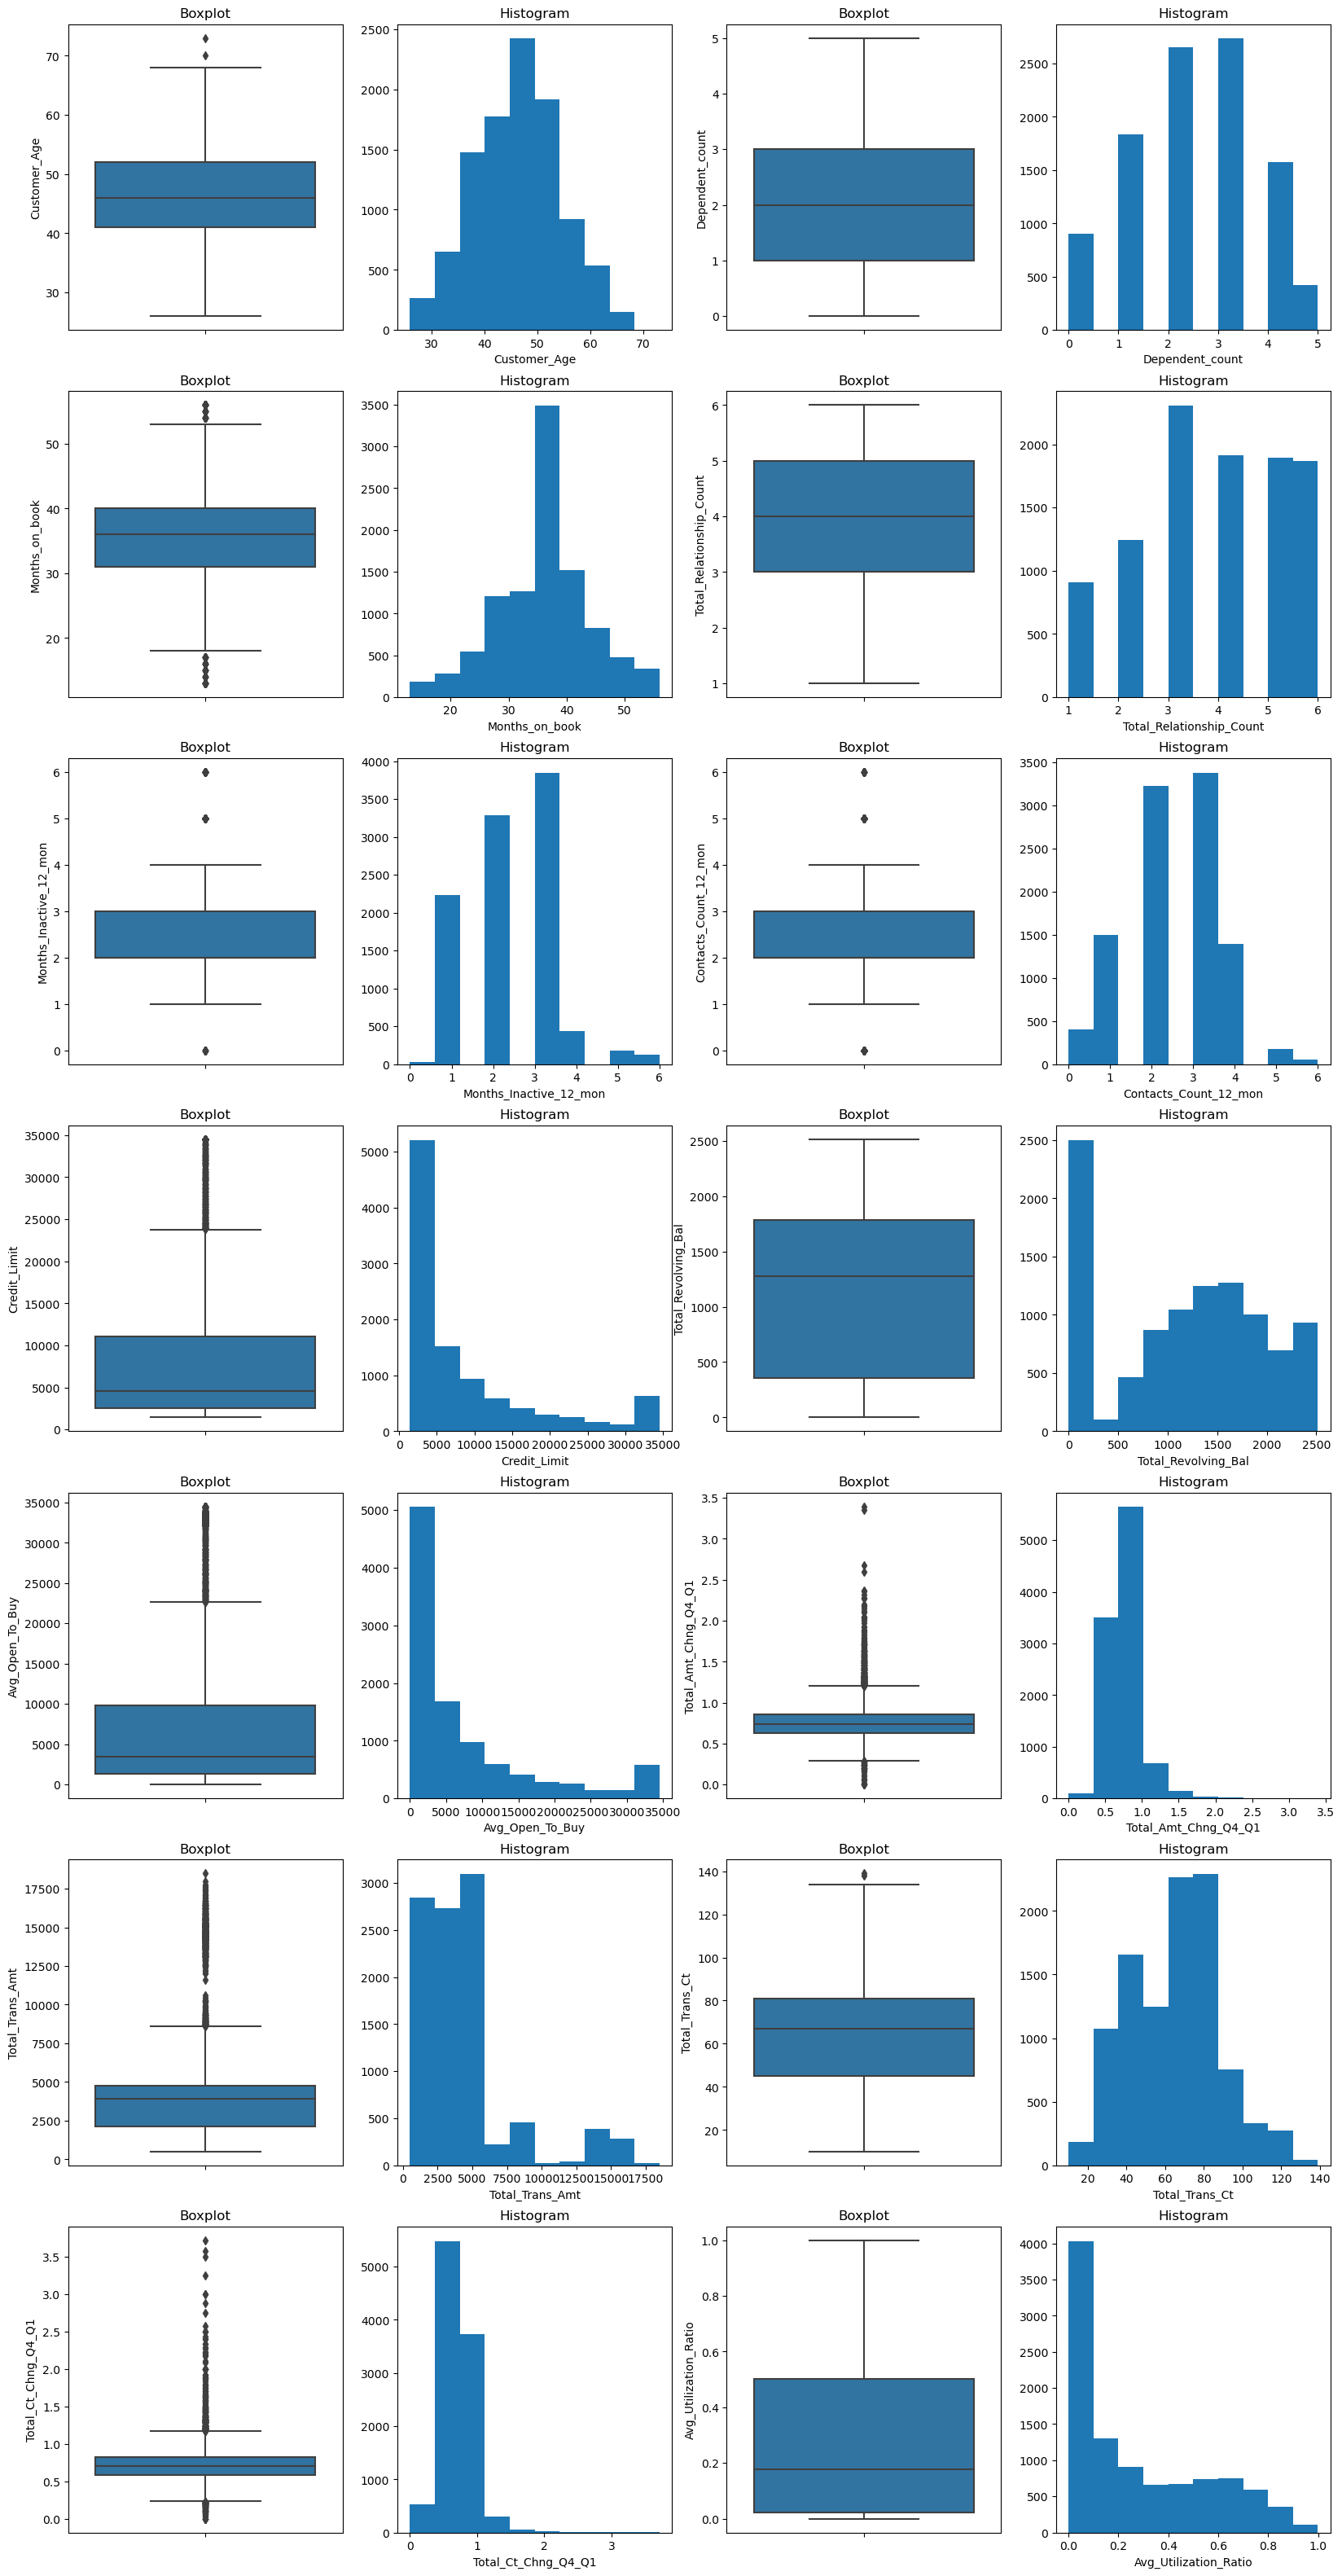

In [83]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns

# Boxplots, histograms for numerical features
plt.figure(figsize=(20, 40))

for i,feat in enumerate(num_feats):
    # Boxplot
    plt.subplot(7,4,2*i+1)
    sns.boxplot(y=df[num_feats[i]])
    plt.title('Boxplot')

    # Histogram
    plt.subplot(7,4,2*i+2)
    plt.hist(x=df[num_feats[i]])
    plt.xlabel(feat)    
    plt.title('Histogram')

plt.show()

# **Categorical Features Visualization**

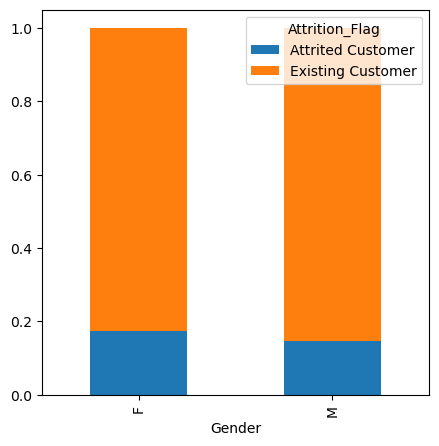

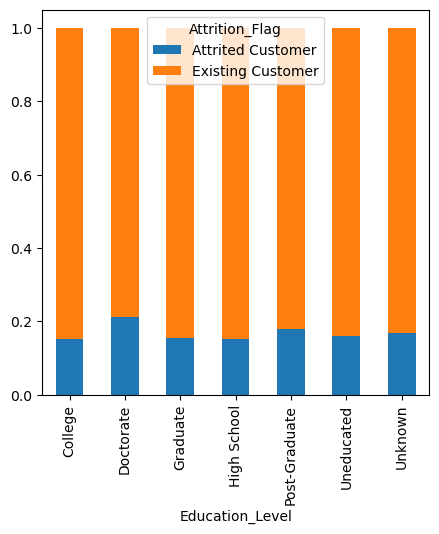

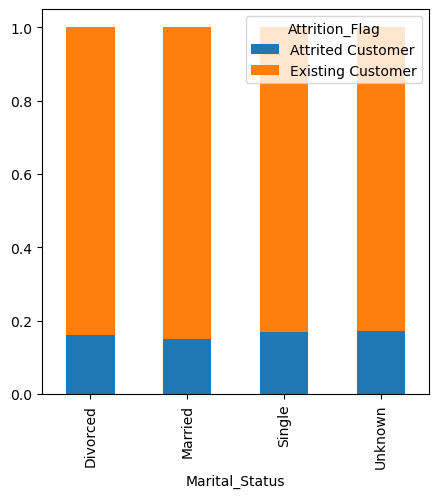

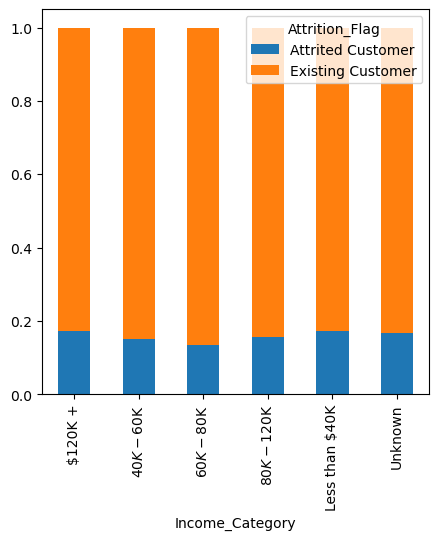

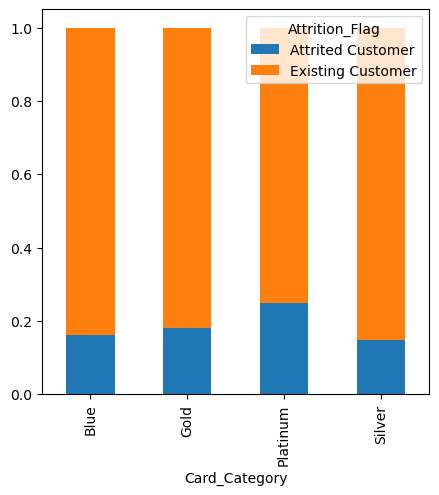

In [ ]:
# Bar charts for categorical features

for i,feat in enumerate(cat_feats):
    # Create a cross-tabulation of the data
    ctab = pd.crosstab(index=df[feat], columns=df['Attrition_Flag'], normalize='index')
    ctab.plot(kind='bar', stacked='True', figsize=(5,5))
    
plt.show()

# **Correlations Heatmaps**

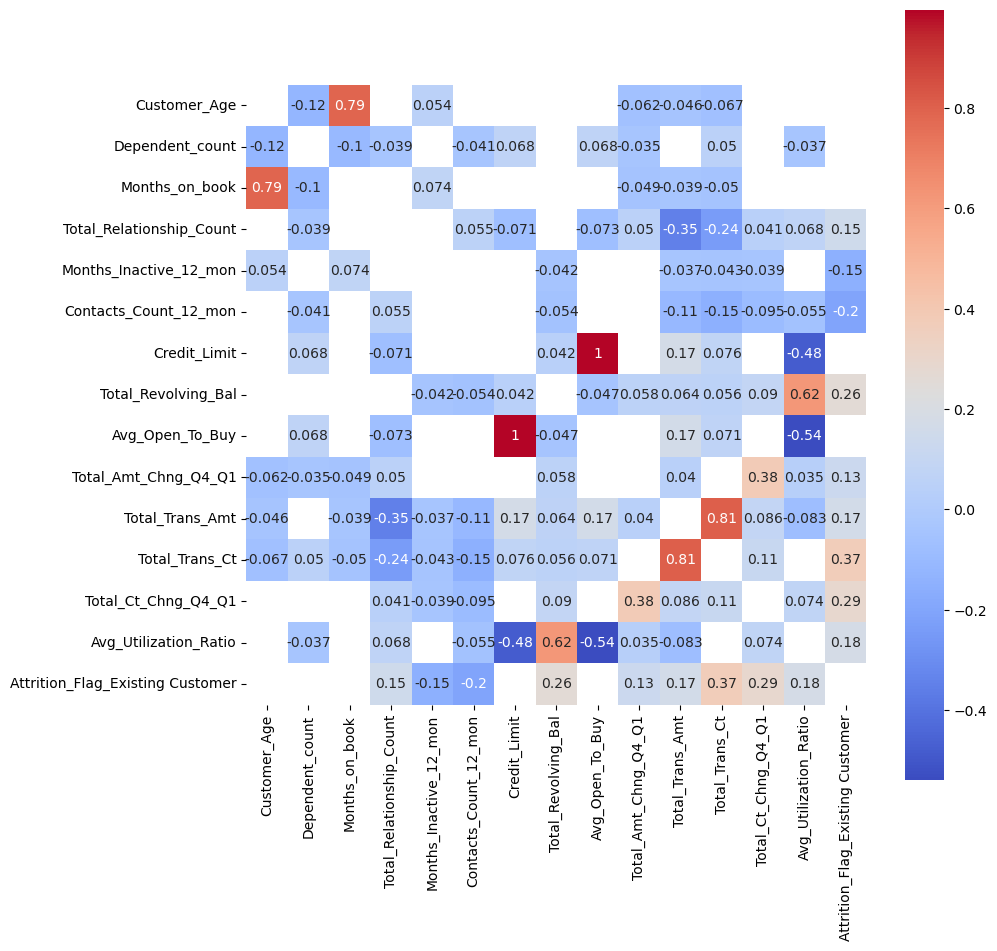

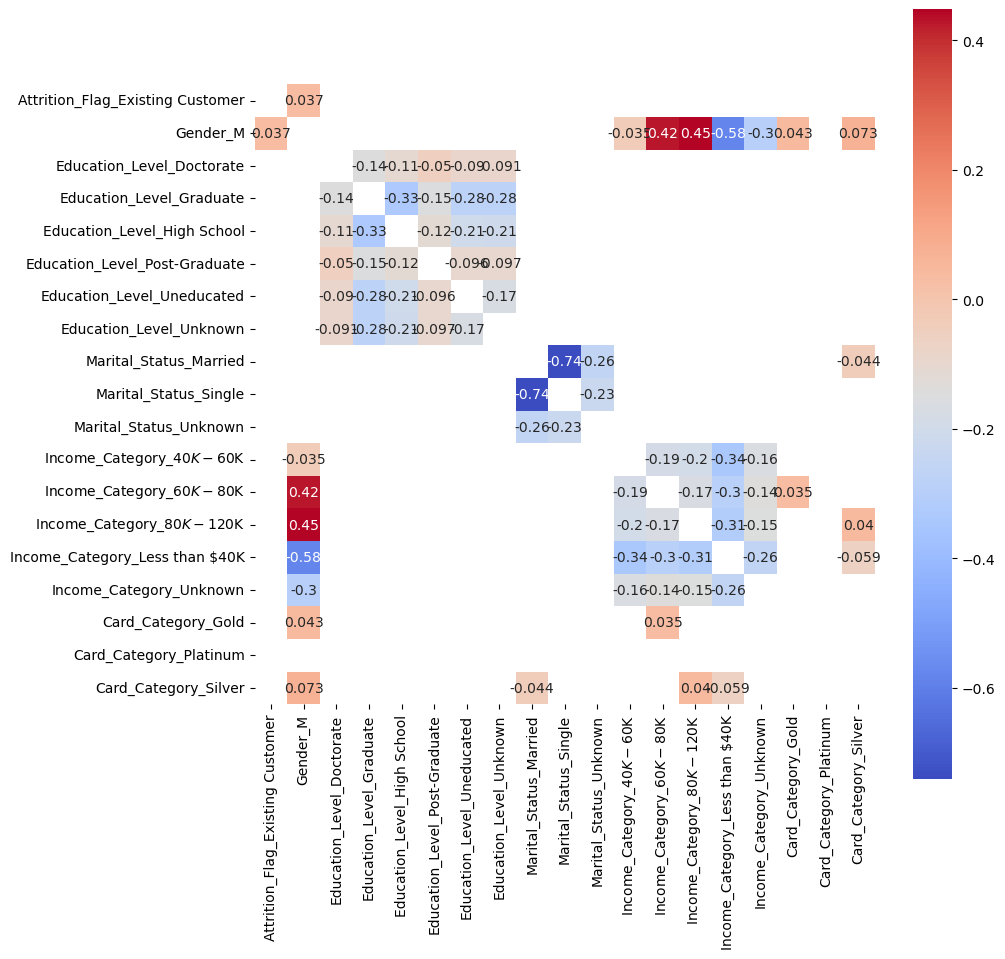

In [85]:
# Numerical features correlations heatmap
df_num = df2[num_feats]
df_num = df_num.join(df2['Attrition_Flag_Existing Customer'])
df_num_corrs = df_num.corr(method='pearson', numeric_only=True)
pval = df_num.corr(method=lambda x,y: pearsonr(x,y)[1], numeric_only=True)
mask = pval > 0.1/100
plt.subplots(figsize=(10,10))
heatmap = sns.heatmap(df_num_corrs, mask=mask, square=True, cmap='coolwarm', annot=True)

# Categorical features correlations heatmap
df_cat = dummies
df_cat_corrs = df_cat.corr(method='pearson', numeric_only=False)
pval = df_cat.corr(method=lambda x,y: pearsonr(x,y)[1], numeric_only=True)
mask = pval > 0.1/100
plt.subplots(figsize=(10,10))
heatmap = sns.heatmap(df_cat_corrs, mask=mask, square=True, cmap='coolwarm', annot=True)

# **Training and Testing Data Split**

In [86]:
from sklearn.model_selection import train_test_split, KFold

# Create the input and output matrices, split in training and testing subsets
y = df2.copy()['Attrition_Flag_Existing Customer']
X = df2.copy().drop(columns=['Attrition_Flag_Existing Customer'])
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

# **Logistic Regression Model**

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## Create the Logistic Regression model and fit the data to it
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

## Predict the classification and print the confusion matrix
y_pred = log_reg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print ('\n' + 'Actual'.rjust(29))
print ('{} |  {}'.format('Churned'.rjust(24),'Existing'))
print ('{}:  {} | {}'.format('Predicted Churned'.rjust(18), cm[0,0], cm[1,0]))
print ('{}:  {} | {}'.format('Predicted Existing'.rjust(15), cm[0,1], cm[1,1]))
print('\nSuccess Rate: {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))
print('Error Rate: {:.2f}%'.format((1-accuracy_score(y_test, y_pred))*100))

## Store the necessary variables for ROC/AUC
cols_to_store = [i for i in range(len(log_reg.classes_)) if log_reg.classes_[i] == 1]
y_logistic_pred = log_reg.predict_proba(X_test)[:,cols_to_store]
y_logistic_true = (y_test.copy() == 1).copy()


                       Actual
                 Churned |  Existing
 Predicted Churned:  249 | 107
Predicted Existing:  207 | 2476

Success Rate: 89.67%
Error Rate: 10.33%


# **Linear Discriminant Analysis Model**

In [89]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Create the Linear Discriminand Analysis model and fit the data to it
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, y_train)

# Predict the classification and print the confusion matrix
y_pred = LDA.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print ('\n' + 'Actual'.rjust(28))
print ('{}  |  {}'.format('Churned'.rjust(23),'Existing'))
print ('{}:  {} | {}'.format('Predicted Churned'.rjust(18), cm[0,0], cm[1,0]))
print ('{}:  {} | {}'.format('Predicted Existing'.rjust(14), cm[0,1], cm[1,1]))

# Print test error of the model
print('\nSuccess Rate: {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))
print('Error Rate: {:.2f}%'.format((1-accuracy_score(y_test, y_pred))*100))

# Store the necessary variables for ROC/AUC
cols_to_store = [i for i in range(len(LDA.classes_)) if LDA.classes_[i] == 1]
y_LDA_pred = LDA.predict_proba(X_test)[:,cols_to_store]
y_LDA_true = (y_test.copy() == 1).copy()


                      Actual
                Churned  |  Existing
 Predicted Churned:  284 | 121
Predicted Existing:  172 | 2462

Success Rate: 90.36%
Error Rate: 9.64%


# **Quadratic Discriminant Analysis Model**

In [90]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


# Create the model and fit the data to it
QDA = QuadraticDiscriminantAnalysis()
QDA.fit(X_train, y_train)

# Predict the classification and print the confusion matrix
y_pred = QDA.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print ('\n' + 'Actual'.rjust(29))
print ('{}  |  {}'.format('Churned'.rjust(23),'Existing'))
print ('{}:  {} | {}'.format('Predicted Churned'.rjust(18), cm[0,0], cm[1,0]))
print ('{}:  {} | {}'.format('Predicted Existing'.rjust(14), cm[0,1], cm[1,1]))

# Print test error of the model
print('\nSuccess Rate: {:.2f}%'.format(accuracy_score(y_pred, y_test)*100))
print('Error Rate: {:.2f}%'.format((1-accuracy_score(y_test, y_pred))*100))

# Store the necessary variables for ROC/AUC
cols_to_store = [i for i in range(len(QDA.classes_)) if QDA.classes_[i] == 1]
y_QDA_pred = QDA.predict_proba(X_test)[:,cols_to_store]
y_QDA_true = (y_test.copy() == 1).copy()


                       Actual
                Churned  |  Existing
 Predicted Churned:  240 | 197
Predicted Existing:  216 | 2386

Success Rate: 86.41%
Error Rate: 13.59%


# **Gaussian Naive Bayes Model**

In [91]:
from sklearn.naive_bayes import GaussianNB

# Create the Gaussian Naive Bayes model and fit the data to it
GNB = GaussianNB()
GNB.fit(X_train, y_train)

# Predict the classification and print the confusion matrix
y_pred = GNB.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print ('\n' + 'Actual'.rjust(29))
print ('{}  |  {}'.format('Churned'.rjust(23),'Existing'))
print ('{}:  {} | {}'.format('Predicted Churned'.rjust(18), cm[0,0], cm[1,0]))
print ('{}:  {} | {}'.format('Predicted Existing'.rjust(14), cm[0,1], cm[1,1]))

# Print success rate
print('\nSuccess Rate: {:.2f}%'.format(accuracy_score(y_pred, y_test)*100))
print('Error Rate: {:.2f}%'.format((1-accuracy_score(y_test, y_pred))*100))

# Store the necessary variables for ROC/AUC
cols_to_store = [i for i in range(len(GNB.classes_)) if GNB.classes_[i] == 1]
y_GNB_pred = GNB.predict_proba(X_test)[:,cols_to_store]
y_GNB_true = (y_test.copy() == 1).copy()


                       Actual
                Churned  |  Existing
 Predicted Churned:  285 | 141
Predicted Existing:  171 | 2442

Success Rate: 89.73%
Error Rate: 10.27%


# **KNN Model**

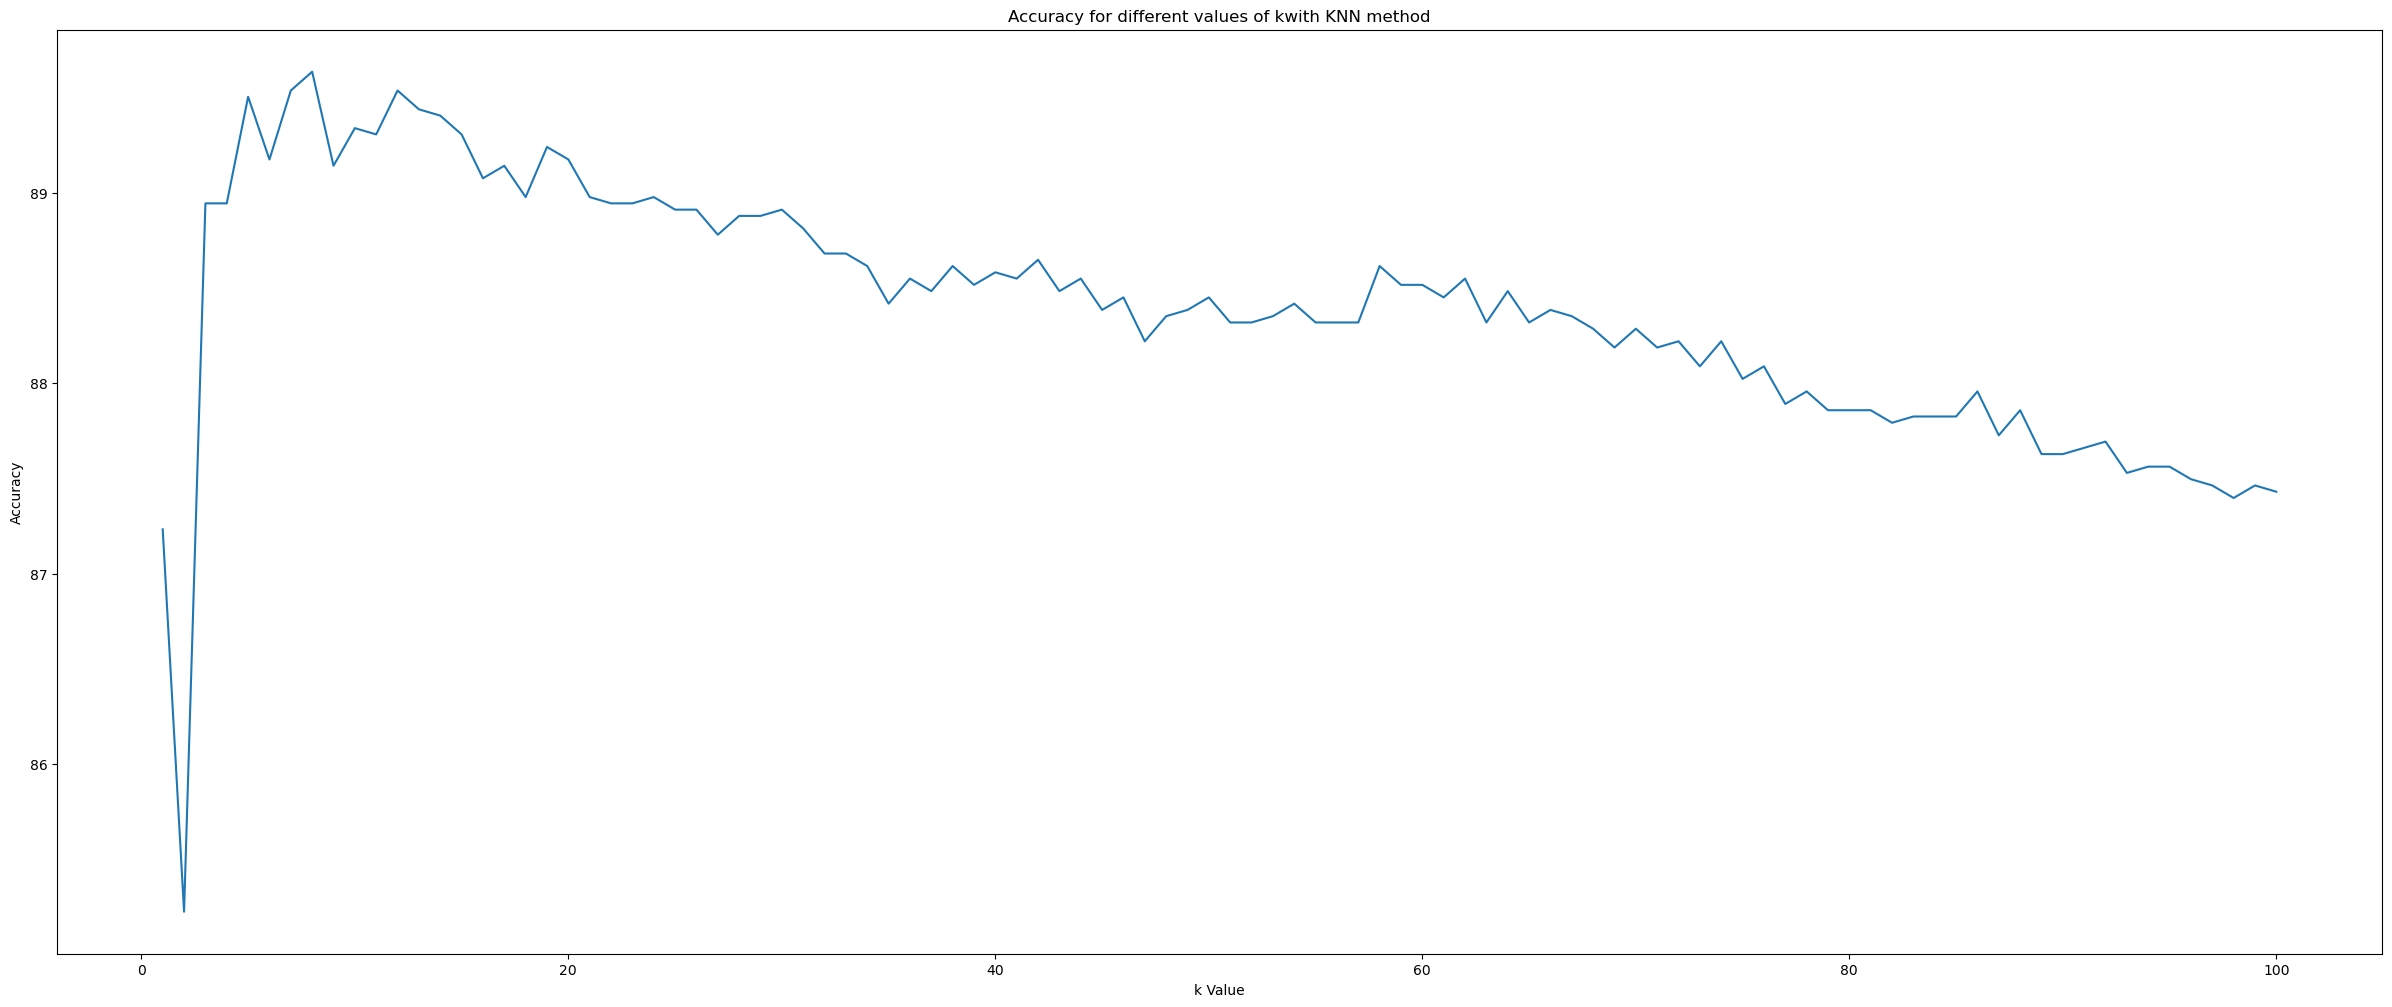


                       Actual
                Churned  |  Existing
 Predicted Churned:  275 | 134
Predicted Existing:  181 | 2449

Success Rate: 89.63%
Error Rate: 10.37%


In [92]:
from sklearn.neighbors import KNeighborsClassifier

def KNN_fit(X_train, X_test, y_train, y_test, n_neighbors, verbosity=0):

    # Create the KNN model and fit the data to it
    KNN = KNeighborsClassifier(n_neighbors=n_neighbors)
    KNN.fit(X_train, y_train)

    # Predict the classification and print the confusion matrix
    y_pred = KNN.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    accuracy_val = accuracy_score(y_pred, y_test)*100
    
    if verbosity == 1:
        print ('\n' + 'Actual'.rjust(29))
        print ('{}  |  {}'.format('Churned'.rjust(23),'Existing'))
        print ('{}:  {} | {}'.format('Predicted Churned'.rjust(18), cm[0,0], cm[1,0]))
        print ('{}:  {} | {}'.format('Predicted Existing'.rjust(14), cm[0,1], cm[1,1]))
        # Print success rate
        print('\nSuccess Rate: {:.2f}%'.format(accuracy_val))
        print('Error Rate: {:.2f}%'.format((1-accuracy_score(y_test, y_pred))*100))


    return KNN, accuracy_val

# Initialize a list to store the accuracies
accuracies = []
knn_limit = 100

# Access the custom created KNN function to calculate the accuracy for each number of neighbors
for i in range(knn_limit):
    _, accuracy_val = KNN_fit(X_train, X_test, y_train, y_test, n_neighbors=i+1, verbosity=0)
    accuracies.append(accuracy_val)

# Plot the results
plt.subplots(figsize=(30, 12))
plt.plot([i+1 for i in range(knn_limit)], accuracies)
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('Accuracy for different values of kwith KNN method')
plt.show()

# Find best K value for KNN model
max_accuracy = max(accuracies)
max_index = accuracies.index(max_accuracy)+1

# Store the necessary variables for ROC/AUC
KNN, accuracy_val = KNN_fit(X_train, X_test, y_train, y_test, n_neighbors=max_index, verbosity=1)
cols_to_store = [i for i in range(len(KNN.classes_)) if KNN.classes_[i] == 1]
y_KNN_pred = KNN.predict_proba(X_test)[:,cols_to_store]
y_KNN_true = (y_test.copy() == 1).copy()

# **AUC scores and ROC curves**

In [93]:
from sklearn.metrics import roc_auc_score

# Print scores of Area under curve (AUC)
print('AUC'.rjust(25))
print('{}: {:.3f}'.format('Logistic Regression'.rjust(19), roc_auc_score(y_logistic_true, y_logistic_pred)))
print('{}: {:.3f}'.format('LDA'.rjust(19), roc_auc_score(y_LDA_true, y_LDA_pred)))
print('{}: {:.3f}'.format('QDA'.rjust(19), roc_auc_score(y_QDA_true, y_QDA_pred)))
print('{}: {:.3f}'.format('Naive Bayes'.rjust(19), roc_auc_score(y_GNB_true, y_GNB_pred)))
print('{}: {:.3f}'.format('KNN (k=2)'.rjust(19), roc_auc_score(y_KNN_true, y_KNN_pred)))

                      AUC
Logistic Regression: 0.912
                LDA: 0.921
                QDA: 0.756
        Naive Bayes: 0.873
          KNN (k=2): 0.897


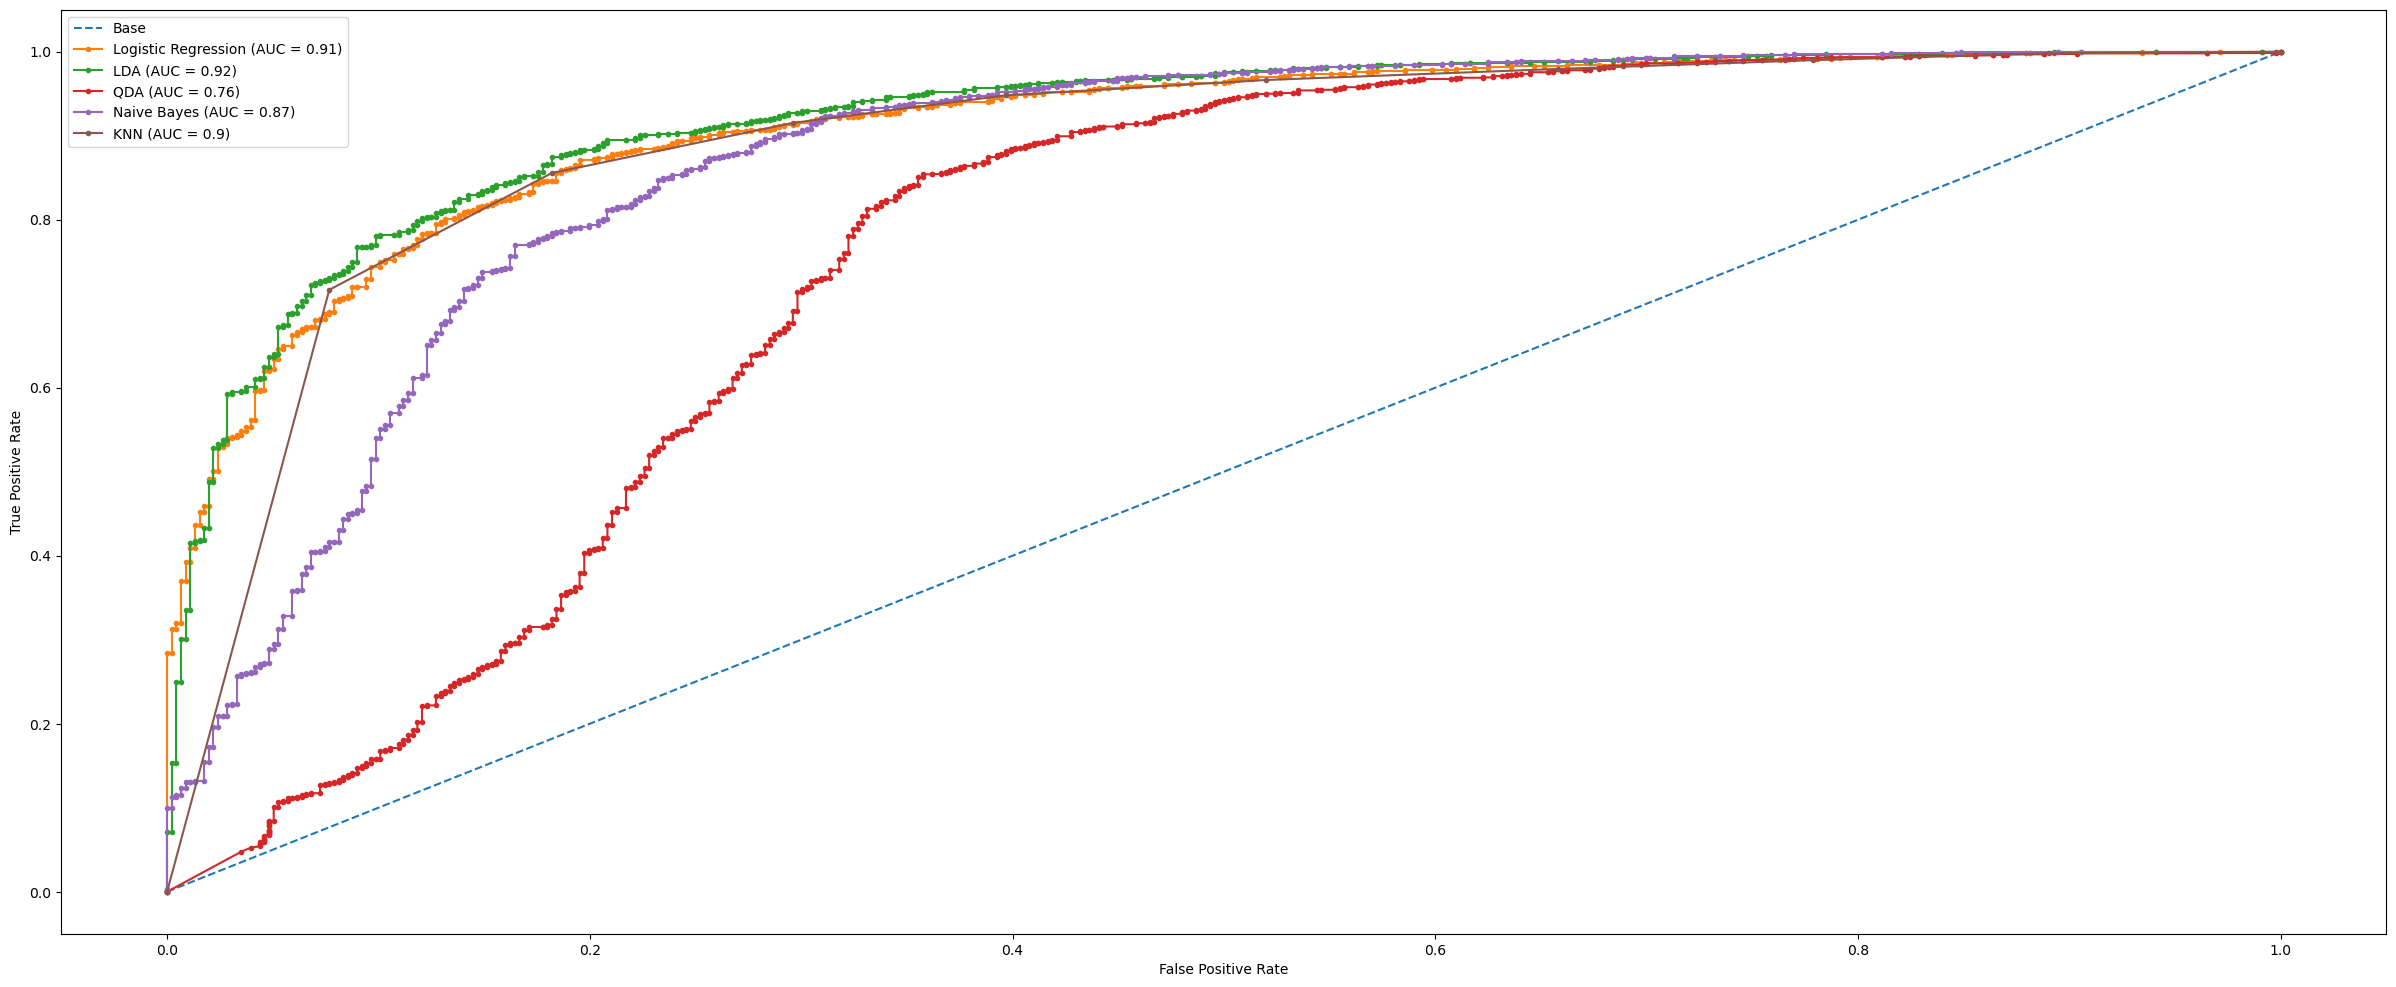

In [94]:
from sklearn.metrics import roc_curve

# Calculate ROC curves
lr_fpr, lr_tpr, _ = roc_curve(y_logistic_true, y_logistic_pred)
lr_fpr1, lr_tpr1, _ = roc_curve(y_LDA_true, y_LDA_pred)
lr_fpr2, lr_tpr2, _ = roc_curve(y_QDA_true, y_QDA_pred)
lr_fpr3, lr_tpr3, _ = roc_curve(y_GNB_true, y_GNB_pred)
lr_fpr4, lr_tpr4, _ = roc_curve(y_KNN_true, y_KNN_pred)

# Plot the ROC curve for the models
plt.subplots(figsize=(30, 12))
plt.plot([0,1], [0,1], linestyle='--', label = 'Base')
plt.plot(lr_fpr, lr_tpr, marker='.', label = 'Logistic Regression (AUC = ' + str(np.round(roc_auc_score(y_logistic_true, y_logistic_pred),2)) + ')')
plt.plot(lr_fpr1, lr_tpr1, marker='.', label = 'LDA (AUC = ' + str(np.round(roc_auc_score(y_LDA_true, y_LDA_pred),2)) + ')')
plt.plot(lr_fpr2, lr_tpr2, marker='.', label = 'QDA (AUC = ' + str(np.round(roc_auc_score(y_QDA_true, y_QDA_pred),2)) + ')')
plt.plot(lr_fpr3, lr_tpr3, marker='.', label = 'Naive Bayes (AUC = ' + str(np.round(roc_auc_score(y_GNB_true, y_GNB_pred),2)) + ')')
plt.plot(lr_fpr4, lr_tpr4, marker='.', label = 'KNN (AUC = ' + str(np.round(roc_auc_score(y_KNN_true, y_KNN_pred),2)) + ')')

# Axis Labels
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# **K-Fold Cross Validation**

In [95]:
from sklearn.metrics import mean_squared_error

# K-Fold Cross Validation
def kfold(regr, X, y, verbosity):
    # If verbosity = 1 show the plots

    mse_all = []
    kf = KFold(n_splits=10, random_state=0, shuffle=True)

    for train, test in kf.split(X):
        X_train = X.values[train]
        X_test = X.values[test]
        y_train = y[train]
        y_test = y[test]

        regr.fit(X_train,y_train)
        y_pred = regr.predict(X_test)
        mse = mean_squared_error(y_pred,y_test)
            
        mse_all.append(mse)

    means = [np.mean(mse_all) for i in np.arange(1,11)]

    #Plot mean squared error for all folds of cross validation
    if verbosity == 1:
        plt.rcParams['figure.figsize'] = [15, 9]

        i=1
        for mse_val in mse_all:
            plt.plot(i, mse_val,'o', label='CV ' + str(i) + ' (MSE = ' + str(round(mse_val,2)) + ')')
            i+=1
        plt.plot(np.arange(1,11),means, label='Mean = ' + str(round(means[0],2)), color='r', linestyle='-')
        plt.legend()
    else:
        None

    return np.mean(means)

In [96]:
mean_log_reg = kfold(log_reg, X, y, 0)
mean_LDA = kfold(LDA, X, y, 0)
mean_QDA = kfold(QDA, X, y, 0)
mean_GNB = kfold(GNB, X, y, 0)
mean_KNN = kfold(KNN, X, y, 0)

print(mean_log_reg, mean_LDA, mean_QDA, mean_GNB, mean_KNN)

0.11029901790556755 0.09449859338481169 0.1346855502967353 0.10318722223739607 0.10437455372645724


# **PCA Dimension Reduction**

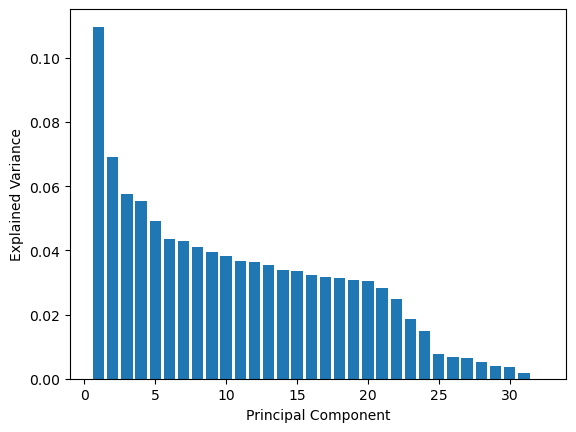

In [97]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def pca_dr(X, n_components, verbosity):
    # If verbosity = 1, plot the explained variance
    # Data normalizing
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Initialize the PCA model
    pca = PCA(n_components=n_components)

    # Fit the PCA model to the data
    pca.fit(X_scaled)

    # Transform the data to the first 3 principal components
    data_pca = pca.transform(X_scaled)

    if verbosity == 1:
        # Plot explained variance
        plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
        plt.xlabel("Principal Component")
        plt.ylabel("Explained Variance")
        plt.show()
    
    return pca, data_pca

_, _ = pca_dr(X, n_components=len(X.columns), verbosity=1)

# **Support Vector Machine (SVM)**

In [98]:
from sklearn.svm import SVC
import matplotlib as mpl

# Function to draw a plot of an SVM (2D)
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
    
    # Support vectors indicated in plot by vertical lines
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='x', s=100, linewidths=1)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)

Number of principal components: 1   Elapsed time: 3.25s    Accuracy: 84.4%
Number of principal components: 2   Elapsed time: 2.82s    Accuracy: 84.11%
Number of principal components: 3   Elapsed time: 3.43s    Accuracy: 83.84%
Number of principal components: 4   Elapsed time: 3.66s    Accuracy: 83.65%
Number of principal components: 5   Elapsed time: 4.37s    Accuracy: 84.3%
Number of principal components: 6   Elapsed time: 4.79s    Accuracy: 83.48%
Number of principal components: 7   Elapsed time: 5.16s    Accuracy: 83.51%
Number of principal components: 8   Elapsed time: 4.92s    Accuracy: 84.27%
Number of principal components: 9   Elapsed time: 5.34s    Accuracy: 86.28%
Number of principal components: 10   Elapsed time: 5.68s    Accuracy: 86.77%
Number of principal components: 11   Elapsed time: 5.72s    Accuracy: 86.34%
Number of principal components: 12   Elapsed time: 5.35s    Accuracy: 86.74%
Number of principal components: 13   Elapsed time: 5.88s    Accuracy: 86.94%
Number of 

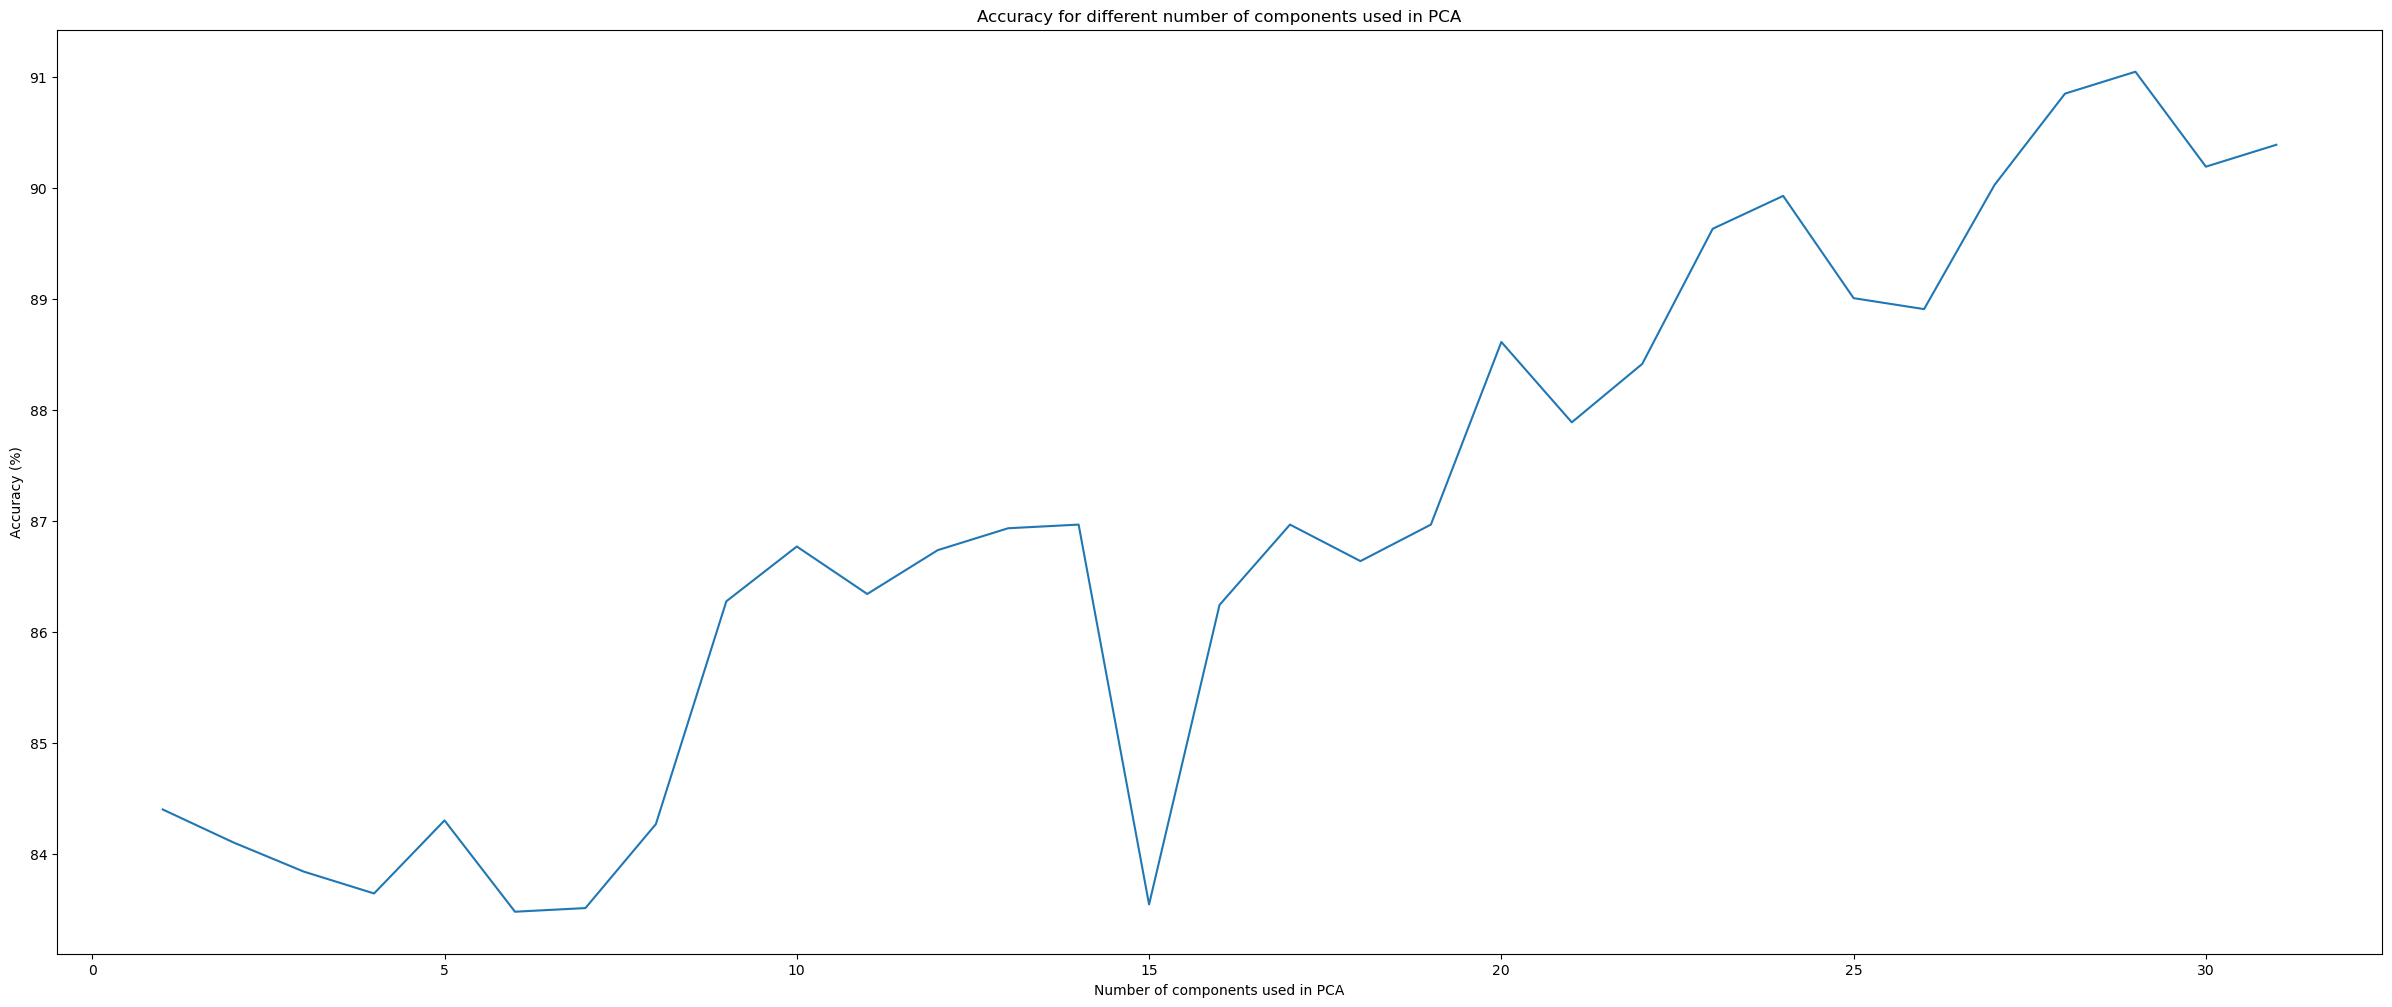

In [99]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import time

accuracies = []
y_svm_pred_list = []
y_svm_true_list = []

# Loop to find out how many principal components provides the best results
for i in range(len(X.columns)-1):
    start_time = time.time()

    pca, data_pca = pca_dr(X, n_components=i+1, verbosity=0)

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(data_pca, y, train_size=0.7)

    # Initialize the SVM model
    svm = SVC(C=1, kernel='linear', probability=True)

    # Fit the model to the training data
    svm.fit(X_train, y_train)

    # Predict the classification and print the confusion matrix
    y_pred = svm.predict(X_test)

    accuracies.append(accuracy_score(y_test, y_pred)*100)

    ## Store the necessary variables for ROC/AUC
    cols_to_store = [i for i in range(len(svm.classes_)) if svm.classes_[i] == 1]
    y_svm_pred = svm.predict_proba(X_test)[:,cols_to_store]
    y_svm_pred_list.append(y_svm_pred)
    y_svm_true = (y_test.copy() == 1).copy()
    y_svm_true_list.append(y_svm_true)

    end_time = time.time()
    elapsed_time = end_time - start_time

    print('Number of principal components: ' + str(i+1) + '   Elapsed time: ' + str(round(elapsed_time,2)) + 's' + '    Accuracy: ' + str(round(accuracy_score(y_test, y_pred)*100,2)) + '%')

# Plot the results
plt.subplots(figsize=(30, 12))
plt.plot([i+1 for i in range(len(X.columns)-1)], accuracies)
plt.xlabel('Number of components used in PCA')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy for different number of components used in PCA')
plt.show()

# Takes around 3min to compute

In [100]:
from sklearn.model_selection import GridSearchCV

# Find best number of components for PCA
max_accuracy = max(accuracies)
max_index = accuracies.index(max_accuracy)+1

pca, data_pca = pca_dr(X, n_components=max_index, verbosity=0)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data_pca, y, train_size=0.7)

In [101]:
# Select the optimal C parameter by cross-validation for linear kernel
tuned_parameters = [{'C': [0.1, 1, 10, 100]}]
svm_linear = GridSearchCV(SVC(kernel='linear'), tuned_parameters, cv=10, scoring='accuracy')
svm_linear.fit(X_train, y_train)

cv_results_linear = pd.DataFrame(svm_linear.cv_results_)

# Takes around 5min to compute

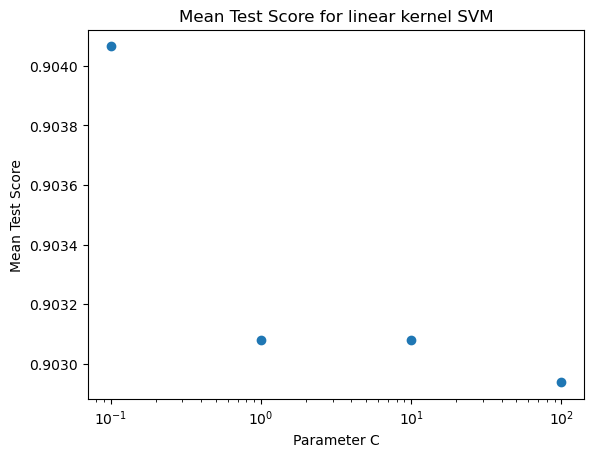

Best parameters:
C = 0.1
Accuracy: 90.41%


In [102]:
fig, ax = plt.subplots()

scatter = plt.scatter(cv_results_linear['param_C'], cv_results_linear['mean_test_score'])

plt.xlabel('Parameter C')
plt.ylabel('Mean Test Score')
plt.title('Mean Test Score for linear kernel SVM')
ax.set_xscale('log')
#fig.colorbar(scatter).set_label('Accuracy Score')

plt.show()

print('Best parameters:\n' + 'C = ' + str(cv_results_linear.loc[cv_results_linear['mean_test_score'].idxmax()]['param_C']) + 
                             '\nAccuracy: ' + str(round(cv_results_linear['mean_test_score'].max()*100,2)) + '%')

In [103]:
# Compute the best linear kernel SVM
svm_best_linear = SVC(C=1, kernel='linear', probability=True)

# Fit the model to the training data
svm_best_linear.fit(X_train, y_train)

# Store the necessary variables for ROC/AUC
cols_to_store = [i for i in range(len(svm_best_linear.classes_)) if svm_best_linear.classes_[i] == 1]
y_svm_best_linear_pred = svm_best_linear.predict_proba(X_test)[:,cols_to_store]
y_svm_best_linear_true = (y_test.copy() == 1).copy()

In [105]:
# Select the optimal C and gamma parameters by cross-validation for polynomial kernel
tuned_parameters = [{'C': [0.1, 1, 10, 100], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]}]
svm_poly = GridSearchCV(SVC(kernel='poly'), tuned_parameters, cv=10, scoring='accuracy')
svm_poly.fit(X_train, y_train)

cv_results_poly = pd.DataFrame(svm_poly.cv_results_)

# Takes around 4min to compute

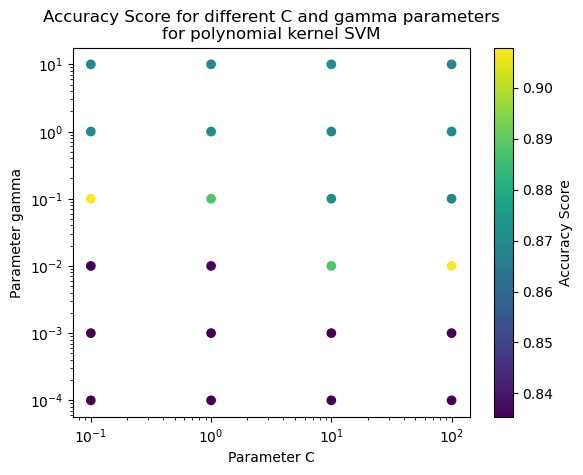

Best parameters:
C = 0.1
gamma = 0.1
Accuracy: 90.79%


In [ ]:
fig, ax = plt.subplots()

scatter = plt.scatter(cv_results_poly['param_C'], cv_results_poly['param_gamma'], c=cv_results_poly['mean_test_score'])

plt.xlabel('Parameter C')
plt.ylabel('Parameter gamma')
plt.title('Accuracy Score for different C and gamma parameters\nfor polynomial kernel SVM')
ax.set_xscale('log')
ax.set_yscale('log')
fig.colorbar(scatter).set_label('Accuracy Score')

plt.show()

print('Best parameters:\n' + 'C = ' + str(cv_results_poly.loc[cv_results_poly['mean_test_score'].idxmax()]['param_C']) + 
                             '\ngamma = ' +  str(cv_results_poly.loc[cv_results_poly['mean_test_score'].idxmax()]['param_gamma']) + 
                             '\nAccuracy: ' + str(round(cv_results_poly['mean_test_score'].max()*100,2)) + '%')

In [107]:
# Compute the best polynomial kernel SVM
svm_best_poly = SVC(C=0.1, gamma=0.1, kernel='poly', probability=True)

# Fit the model to the training data
svm_best_poly.fit(X_train, y_train)

# Store the necessary variables for ROC/AUC
cols_to_store = [i for i in range(len(svm_best_poly.classes_)) if svm_best_poly.classes_[i] == 1]
y_svm_best_poly_pred = svm_best_poly.predict_proba(X_test)[:,cols_to_store]
y_svm_best_poly_true = (y_test.copy() == 1).copy()

In [108]:
# Select the optimal C and gamma parameters by cross-validation for RBF kernel
tuned_parameters = [{'C': [0.1, 1, 10, 100], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]}]
svm_rbf = GridSearchCV(SVC(kernel='rbf'), tuned_parameters, cv=10, scoring='accuracy')
svm_rbf.fit(X_train, y_train)

cv_results_rbf = pd.DataFrame(svm_rbf.cv_results_)

# Takes around 7min to compute

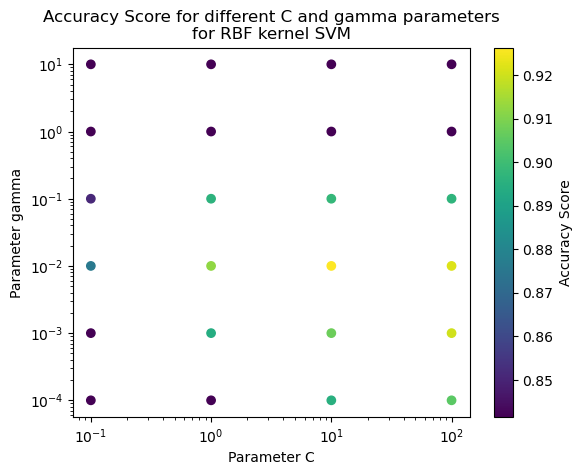

Best parameters:
C = 10
gamma = 0.01
Accuracy: 92.64%


In [109]:
fig, ax = plt.subplots()

scatter = plt.scatter(cv_results_rbf['param_C'], cv_results_rbf['param_gamma'], c=cv_results_rbf['mean_test_score'])

plt.xlabel('Parameter C')
plt.ylabel('Parameter gamma')
plt.title('Accuracy Score for different C and gamma parameters\nfor RBF kernel SVM')
ax.set_xscale('log')
ax.set_yscale('log')
fig.colorbar(scatter).set_label('Accuracy Score')

plt.show()

print('Best parameters:\n' + 'C = ' + str(cv_results_rbf.loc[cv_results_rbf['mean_test_score'].idxmax()]['param_C']) + 
                             '\ngamma = ' +  str(cv_results_rbf.loc[cv_results_rbf['mean_test_score'].idxmax()]['param_gamma']) +
                             '\nAccuracy: ' + str(round(cv_results_rbf['mean_test_score'].max()*100,2)) + '%')

In [114]:
# Compute the best RBF kernel SVM
svm_best_rbf = SVC(C=10, gamma=0.01, kernel='rbf', probability=True)

# Fit the model to the training data
svm_best_rbf.fit(X_train, y_train)

# Store the necessary variables for ROC/AUC
cols_to_store = [i for i in range(len(svm_best_rbf.classes_)) if svm_best_rbf.classes_[i] == 1]
y_svm_best_rbf_pred = svm_best_rbf.predict_proba(X_test)[:,cols_to_store]
y_svm_best_rbf_true = (y_test.copy() == 1).copy()

In [110]:
# Select the optimal C and gamma parameters by cross-validation for sigmoid kernel
tuned_parameters = [{'C': [0.1, 1, 10, 100], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]}]
svm_sigmoid = GridSearchCV(SVC(kernel='sigmoid'), tuned_parameters, cv=10, scoring='accuracy')
svm_sigmoid.fit(X_train, y_train)

cv_results_sigmoid = pd.DataFrame(svm_sigmoid.cv_results_)

# Takes around 3min to compute

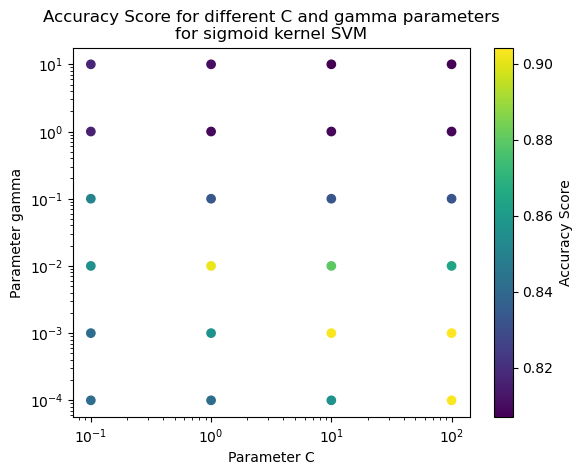

Best parameters:
C = 100
gamma = 0.001
Accuracy: 90.42%


In [111]:
fig, ax = plt.subplots()

scatter = plt.scatter(cv_results_sigmoid['param_C'], cv_results_sigmoid['param_gamma'], c=cv_results_sigmoid['mean_test_score'])

plt.xlabel('Parameter C')
plt.ylabel('Parameter gamma')
plt.title('Accuracy Score for different C and gamma parameters\nfor sigmoid kernel SVM')
ax.set_xscale('log')
ax.set_yscale('log')
fig.colorbar(scatter).set_label('Accuracy Score')

plt.show()

print('Best parameters:\n' + 'C = ' + str(cv_results_sigmoid.loc[cv_results_sigmoid['mean_test_score'].idxmax()]['param_C']) + 
                             '\ngamma = ' +  str(cv_results_sigmoid.loc[cv_results_sigmoid['mean_test_score'].idxmax()]['param_gamma']) +
                             '\nAccuracy: ' + str(round(cv_results_sigmoid['mean_test_score'].max()*100,2)) + '%')

In [112]:
# Compute the best sigmoid kernel SVM
svm_best_sigmoid = SVC(C=100, gamma=0.001, kernel='sigmoid', probability=True)

# Fit the model to the training data
svm_best_sigmoid.fit(X_train, y_train)

# Store the necessary variables for ROC/AUC
cols_to_store = [i for i in range(len(svm_best_sigmoid.classes_)) if svm_best_sigmoid.classes_[i] == 1]
y_svm_best_sigmoid_pred = svm_best_sigmoid.predict_proba(X_test)[:,cols_to_store]
y_svm_best_sigmoid_true = (y_test.copy() == 1).copy()

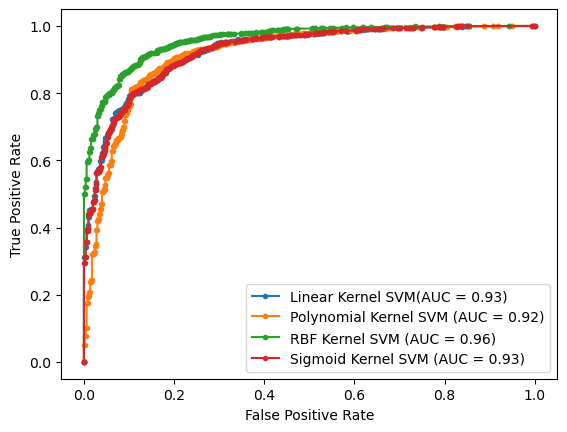

In [115]:
lr_fpr, lr_tpr, _ = roc_curve(y_svm_best_linear_true, y_svm_best_linear_pred)
lr_fpr1, lr_tpr1, _ = roc_curve(y_svm_best_poly_true, y_svm_best_poly_pred)
lr_fpr2, lr_tpr2, _ = roc_curve(y_svm_best_rbf_true, y_svm_best_rbf_pred)
lr_fpr3, lr_tpr3, _ = roc_curve(y_svm_best_sigmoid_true, y_svm_best_sigmoid_pred)

plt.plot(lr_fpr, lr_tpr, marker='.', label = 'Linear Kernel SVM(AUC = ' + str(np.round(roc_auc_score(y_svm_best_linear_true, y_svm_best_linear_pred),2)) + ')')
plt.plot(lr_fpr1, lr_tpr1, marker='.', label = 'Polynomial Kernel SVM (AUC = ' + str(np.round(roc_auc_score(y_svm_best_poly_true, y_svm_best_poly_pred),2)) + ')')
plt.plot(lr_fpr2, lr_tpr2, marker='.', label = 'RBF Kernel SVM (AUC = ' + str(np.round(roc_auc_score(y_svm_best_rbf_true, y_svm_best_rbf_pred),2)) + ')')
plt.plot(lr_fpr3, lr_tpr3, marker='.', label = 'Sigmoid Kernel SVM (AUC = ' + str(np.round(roc_auc_score(y_svm_best_sigmoid_true, y_svm_best_sigmoid_pred),2)) + ')')

# Axis Labels
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()